In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify
from itertools import product
import random
from scipy.linalg import norm
import time
import re

**Define path.**

In [2]:
# Defining path to folder raw data is saved in
path = "C:/Users/robtk/OneDrive/Desktop/DIAS Internship/Raw data/Harmonic oscillator warm up/"

### Set display of pandas dataframes and Series to 11 decimal places

In [3]:
pd.set_option("display.precision", 11)

## Read in the outputs for 9 4x4 Complex Matrices

In [124]:
data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_original_sprott_sim5.txt'):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 4, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-3
record_steps = 1000
seconds_simulated = 50
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X1_sprott_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


In [ ]:
data = []
my_regex = re.compile("-?\d+.\d+")

for line in open(path+'V_perturbed_1_sim5.txt'):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)

data = np.array(data).reshape(-1, 4, np.array(data).shape[1])

V_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    V_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# V_matrices is now a list of 9 arrays, each holding the time evolutions of V1-V9 respectively.


# Put each array into a column of a dataframe
labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

V1_DF = pd.DataFrame({"V1" : V_matrices[0].tolist(), "V2" : V_matrices[1].tolist(), "V3" : V_matrices[2].tolist(), "V4" : V_matrices[3].tolist(), "V5" : V_matrices[4].tolist(),
                     "V6" : V_matrices[5].tolist(), "V7" : V_matrices[6].tolist(), "V8" : V_matrices[7].tolist(), "V9" : V_matrices[8].tolist()}, index = times,
                    columns = labels)


**Check that the Gauss' law constraint is conserved.**

In [28]:
# Define the commutator
def commutator(A,B):
    
    # matmul() multiplies two matrices together
    return np.matmul(A,B) - np.matmul(B,A)

## Are Xi still traceless

## Gauss' Law test

In [29]:
i = 0
while i < len(X1_DF.iloc[:,0]):
    
    # Computes the sum of the commutators of Xi and Vi and if they equal zero move on to the next one.
    XXX = X1_DF
    VVV = V1_DF
    Gauss = (commutator(np.array(XXX.iloc[i,0]), np.array(VVV.iloc[i,0])) + 
             commutator(np.array(XXX.iloc[i,1]), np.array(VVV.iloc[i,1])) +
             commutator(np.array(XXX.iloc[i,2]), np.array(VVV.iloc[i,2])) + 
             commutator(np.array(XXX.iloc[i,3]), np.array(VVV.iloc[i,3])) +
             commutator(np.array(XXX.iloc[i,4]), np.array(VVV.iloc[i,4])) + 
             commutator(np.array(XXX.iloc[i,5]), np.array(VVV.iloc[i,5])) + 
             commutator(np.array(XXX.iloc[i,6]), np.array(VVV.iloc[i,6])) + 
             commutator(np.array(XXX.iloc[i,7]), np.array(VVV.iloc[i,7])) + 
             commutator(np.array(XXX.iloc[i,8]), np.array(VVV.iloc[i,8])) )

             
             
    i+=1
    print(i)
    print(Gauss)

1
[[ 0.        +0.00021483j  0.00302125+0.00346042j -0.00319109+0.00073782j
  -0.00349577-0.00842825j]
 [-0.00302125+0.00346042j  0.        -0.001713j    0.00338244+0.00852136j
  -0.001296  -0.00089674j]
 [ 0.00319109+0.00073782j -0.00338244+0.00852136j  0.        +0.00025925j
   0.00557697-0.00631859j]
 [ 0.00349577-0.00842825j  0.001296  -0.00089674j -0.00557697-0.00631859j
   0.        +0.00123892j]]
2
[[ 0.00000000e+00+5.28695299e-11j  1.97680206e-11+3.82622736e-11j
  -1.22968030e-10+4.76729212e-11j -2.63690077e-11-1.16516677e-10j]
 [-1.97680206e-11+3.82622736e-11j  0.00000000e+00-7.58473527e-11j
   2.73341523e-11+1.40336961e-10j -5.59485930e-11-2.99379462e-11j]
 [ 1.22968030e-10+4.76729212e-11j -2.73341523e-11+1.40336961e-10j
   0.00000000e+00-8.00748530e-12j  1.26687480e-10-9.08689287e-11j]
 [ 2.63690077e-11-1.16516677e-10j  5.59485930e-11-2.99379462e-11j
  -1.26687480e-10-9.08689287e-11j  0.00000000e+00+3.09853098e-11j]]
3
[[ 0.00000000e+00+6.81845587e-11j  8.50546369e-12+3.6620

120
[[ 0.00000000e+00-7.62383903e-10j -3.48700933e-09-1.28981420e-09j
  -1.42759598e-09+4.02371891e-09j  2.38865806e-09-1.64545917e-09j]
 [ 3.48700933e-09-1.28981420e-09j  0.00000000e+00+1.94590694e-09j
   2.69324789e-10+7.38103822e-09j -2.68956622e-09+6.76970712e-09j]
 [ 1.42759598e-09+4.02371891e-09j -2.69324789e-10+7.38103822e-09j
   0.00000000e+00-3.89658350e-09j -4.51247876e-09+9.96037420e-09j]
 [-2.38865806e-09-1.64545917e-09j  2.68956622e-09+6.76970712e-09j
   4.51247876e-09+9.96037420e-09j  0.00000000e+00+2.71306046e-09j]]
121
[[ 0.00000000e+00-1.33583435e-09j -3.46081623e-09-1.23336948e-09j
  -1.56173725e-09+3.65238649e-09j  2.67881662e-09-1.87895461e-09j]
 [ 3.46081623e-09-1.23336948e-09j  0.00000000e+00+1.85980988e-09j
  -3.21646015e-10+7.00057149e-09j -2.08590256e-09+6.27926893e-09j]
 [ 1.56173725e-09+3.65238649e-09j  3.21646015e-10+7.00057149e-09j
   0.00000000e+00-3.19151907e-09j -4.12117286e-09+1.05476091e-08j]
 [-2.67881662e-09-1.87895461e-09j  2.08590256e-09+6.27926893

216
[[ 0.00000000e+00-2.36275052e-08j  4.49446875e-09+4.11840778e-08j
  -8.68383168e-09-7.44173105e-09j -2.00254240e-08+5.09145706e-09j]
 [-4.49446875e-09+4.11840778e-08j  0.00000000e+00-2.41398374e-09j
   1.37063004e-09-1.97530795e-09j  8.62940697e-09-2.11020094e-08j]
 [ 8.68383168e-09-7.44173105e-09j -1.37063004e-09-1.97530795e-09j
   0.00000000e+00+2.72748535e-08j -8.47120720e-09+9.27576763e-09j]
 [ 2.00254240e-08+5.09145706e-09j -8.62940697e-09-2.11020094e-08j
   8.47120720e-09+9.27576763e-09j  0.00000000e+00-1.23336456e-09j]]
217
[[ 0.00000000e+00-2.39541841e-08j  8.39723740e-09+4.03046894e-08j
  -8.30510072e-09-3.93673495e-09j -1.92209407e-08+4.44542123e-09j]
 [-8.39723740e-09+4.03046894e-08j  0.00000000e+00-5.09922075e-09j
   6.46395344e-10-1.93278059e-09j  4.44237640e-09-2.17670654e-08j]
 [ 8.30510072e-09-3.93673495e-09j -6.46395344e-10-1.93278059e-09j
   0.00000000e+00+2.75248535e-08j -8.13877024e-09+8.97465743e-09j]
 [ 1.92209407e-08+4.44542123e-09j -4.44237640e-09-2.17670654

362
[[ 0.00000000e+00-1.07723961e-08j -7.60045125e-08-7.70052436e-08j
  -2.12887148e-08-6.77230375e-09j  1.20451990e-08-1.12936805e-08j]
 [ 7.60045125e-08-7.70052436e-08j  0.00000000e+00-1.99812424e-08j
   9.26727267e-09-7.32134577e-08j  6.99269358e-08+1.28737525e-08j]
 [ 2.12887148e-08-6.77230375e-09j -9.26727267e-09-7.32134577e-08j
   0.00000000e+00+2.88831105e-08j  3.88461414e-08+9.73616996e-08j]
 [-1.20451990e-08-1.12936805e-08j -6.99269358e-08+1.28737525e-08j
  -3.88461414e-08+9.73616996e-08j  0.00000000e+00+1.87052797e-09j]]
363
[[ 0.00000000e+00-2.87416807e-09j -7.09021093e-08-8.28379973e-08j
  -1.80891301e-08-9.64204941e-09j  2.23988929e-08-1.10626907e-08j]
 [ 7.09021093e-08-8.28379973e-08j  0.00000000e+00-8.62184317e-09j
  -7.13592448e-09-5.41541390e-08j  6.28016878e-08+8.87086006e-09j]
 [ 1.80891301e-08-9.64204941e-09j  7.13592448e-09-5.41541390e-08j
   0.00000000e+00+1.19174962e-08j  3.87479007e-08+1.04181061e-07j]
 [-2.23988929e-08-1.10626907e-08j -6.28016878e-08+8.87086006

511
[[ 0.00000000e+00-1.29734541e-07j -6.41569167e-08+3.00663291e-07j
  -7.05755970e-09-1.46960707e-07j -3.79285794e-08-8.00144799e-07j]
 [ 6.41569167e-08+3.00663291e-07j  0.00000000e+00-6.32039830e-07j
  -5.08926269e-07+1.46382541e-07j  3.37656910e-07+4.56094833e-07j]
 [ 7.05755970e-09-1.46960707e-07j  5.08926269e-07+1.46382541e-07j
   0.00000000e+00+2.93289662e-07j  4.92740417e-07-4.33945627e-08j]
 [ 3.79285794e-08-8.00144799e-07j -3.37656910e-07+4.56094833e-07j
  -4.92740417e-07-4.33945627e-08j  0.00000000e+00+4.68484709e-07j]]
512
[[ 0.00000000e+00-1.66134679e-07j -3.68790203e-08+4.02135155e-07j
  -4.51012202e-10-1.46529351e-07j -8.42145309e-08-9.31393333e-07j]
 [ 3.68790203e-08+4.02135155e-07j  0.00000000e+00-5.96247301e-07j
  -4.96413523e-07+1.83858670e-07j  2.97711580e-07+4.52884556e-07j]
 [ 4.51012202e-10-1.46529351e-07j  4.96413523e-07+1.83858670e-07j
   0.00000000e+00+2.58012064e-07j  5.24897887e-07+4.24963729e-08j]
 [ 8.42145309e-08-9.31393333e-07j -2.97711580e-07+4.52884556

621
[[ 0.00000000e+00-3.67551388e-07j  2.92585186e-07-3.69140213e-07j
   2.18320824e-08+1.56361231e-07j -5.18529477e-07+4.60883792e-07j]
 [-2.92585186e-07-3.69140213e-07j  0.00000000e+00+2.92006990e-06j
  -1.40360083e-06+7.59452926e-07j  2.02889247e-06+1.51782701e-06j]
 [-2.18320824e-08+1.56361231e-07j  1.40360083e-06+7.59452926e-07j
   0.00000000e+00-2.79532669e-06j -2.52384081e-06+2.83749743e-06j]
 [ 5.18529477e-07+4.60883792e-07j -2.02889247e-06+1.51782701e-06j
   2.52384081e-06+2.83749743e-06j  0.00000000e+00+2.42808179e-07j]]
622
[[ 0.00000000e+00-5.68826599e-07j  1.73008629e-07-4.60947870e-07j
   8.66324417e-08+2.46743468e-07j -6.37269662e-07+3.23640554e-07j]
 [-1.73008629e-07-4.60947870e-07j  0.00000000e+00+2.83043222e-06j
  -1.29220198e-06+7.58712780e-07j  2.13980348e-06+1.46129106e-06j]
 [-8.66324417e-08+2.46743468e-07j  1.29220198e-06+7.58712780e-07j
   0.00000000e+00-2.64827076e-06j -2.63022776e-06+3.03476450e-06j]
 [ 6.37269662e-07+3.23640554e-07j -2.13980348e-06+1.46129106

645
[[ 0.00000000e+00+1.35042788e-06j -3.90574429e-07-2.08602302e-06j
  -1.01424954e-06-1.71313353e-06j  4.93635077e-07-4.15208318e-06j]
 [ 3.90574429e-07-2.08602302e-06j  0.00000000e+00-1.97599600e-06j
   7.87502312e-07-1.12244111e-06j -1.67209749e-06+1.84974899e-06j]
 [ 1.01424954e-06-1.71313353e-06j -7.87502312e-07-1.12244111e-06j
   0.00000000e+00+1.94257112e-07j  2.46348524e-06-5.13934895e-06j]
 [-4.93635077e-07-4.15208318e-06j  1.67209749e-06+1.84974899e-06j
  -2.46348524e-06-5.13934895e-06j  0.00000000e+00+4.31311012e-07j]]
646
[[ 0.00000000e+00+9.16323807e-07j -4.49990769e-07-2.28936407e-06j
  -1.36591912e-06-1.86483798e-06j  5.18463578e-07-4.34489626e-06j]
 [ 4.49990769e-07-2.28936407e-06j  0.00000000e+00-1.26630076e-06j
   4.42645253e-07-1.12066250e-06j -1.22721881e-06+1.86377370e-06j]
 [ 1.36591912e-06-1.86483798e-06j -4.42645253e-07-1.12066250e-06j
   0.00000000e+00-1.33022139e-08j  2.49756039e-06-5.37439062e-06j]
 [-5.18463578e-07-4.34489626e-06j  1.22721881e-06+1.86377370

672
[[ 0.00000000e+00+1.19224392e-06j  3.04332233e-06+2.20161953e-06j
   5.99417375e-06+3.12060155e-06j  8.86834959e-08+2.96724454e-06j]
 [-3.04332233e-06+2.20161953e-06j  0.00000000e+00-4.30592268e-06j
  -1.77775701e-06-2.13532569e-06j -1.67778941e-06-2.26282456e-06j]
 [-5.99417375e-06+3.12060155e-06j  1.77775701e-06-2.13532569e-06j
   0.00000000e+00-8.51899106e-07j -2.18530367e-06+5.49298450e-06j]
 [-8.86834959e-08+2.96724454e-06j  1.67778941e-06-2.26282456e-06j
   2.18530367e-06+5.49298450e-06j  0.00000000e+00+3.96557787e-06j]]
673
[[ 0.00000000e+00+1.76242037e-06j  3.64698565e-06+2.09065282e-06j
   6.18256314e-06+2.82203276e-06j -3.66851003e-07+2.95625568e-06j]
 [-3.64698565e-06+2.09065282e-06j  0.00000000e+00-5.03575575e-06j
  -1.73746993e-06-2.37960143e-06j -2.05071163e-06-2.36042218e-06j]
 [-6.18256314e-06+2.82203276e-06j  1.73746993e-06-2.37960143e-06j
   0.00000000e+00-8.51552852e-07j -1.54337374e-06+5.52740538e-06j]
 [ 3.66851003e-07+2.95625568e-06j  2.05071163e-06-2.36042218

   3.95369991e-06+3.81564138e-06j  0.00000000e+00+7.87757839e-07j]]
720
[[ 0.00000000e+00-1.57526558e-06j  6.03667350e-06+7.26369612e-06j
   2.00896273e-06+4.94307605e-06j -6.05329722e-06-1.25165378e-06j]
 [-6.03667350e-06+7.26369612e-06j  0.00000000e+00+7.10232012e-06j
   3.82812960e-07-3.12049151e-06j  3.77884886e-06-1.26155659e-06j]
 [-2.00896273e-06+4.94307605e-06j -3.82812960e-07-3.12049151e-06j
   0.00000000e+00-5.46448576e-06j -2.77677605e-06+4.06617799e-06j]
 [ 6.05329722e-06-1.25165378e-06j -3.77884886e-06-1.26155659e-06j
   2.77677605e-06+4.06617799e-06j  0.00000000e+00-6.25687811e-08j]]
721
[[ 0.00000000e+00-1.88764656e-06j  4.70572650e-06+7.25802289e-06j
  -1.63782456e-07+3.14689817e-06j -7.22639674e-06-1.65971520e-06j]
 [-4.70572650e-06+7.25802289e-06j  0.00000000e+00+7.50905608e-06j
  -2.57711605e-07-3.50806519e-06j  4.98814354e-06-1.70784760e-06j]
 [ 1.63782456e-07+3.14689817e-06j  2.57711605e-07-3.50806519e-06j
   0.00000000e+00-4.69863133e-06j -1.50940751e-06+4.3023429

762
[[ 0.00000000e+00-1.16939880e-05j  9.35953996e-06+1.11479855e-05j
  -4.74841371e-06+1.08654537e-05j  3.31807915e-06-5.82840737e-06j]
 [-9.35953996e-06+1.11479855e-05j  0.00000000e+00+5.81749984e-06j
   7.65802969e-06-7.66931176e-06j  8.45695950e-06-2.15746615e-06j]
 [ 4.74841371e-06+1.08654537e-05j -7.65802969e-06-7.66931176e-06j
   0.00000000e+00-1.72260222e-06j -2.68717462e-06-5.07413196e-06j]
 [-3.31807915e-06-5.82840737e-06j -8.45695950e-06-2.15746615e-06j
   2.68717462e-06-5.07413196e-06j  0.00000000e+00+7.59909041e-06j]]
763
[[ 0.00000000e+00-1.11276402e-05j  6.50341232e-06+1.07019063e-05j
  -4.29934703e-06+1.02848283e-05j  1.63783989e-06-5.08994992e-06j]
 [-6.50341232e-06+1.07019063e-05j  0.00000000e+00+5.54369158e-06j
   8.84970905e-06-8.07881503e-06j  7.56710714e-06-2.62474075e-06j]
 [ 4.29934703e-06+1.02848283e-05j -8.84970905e-06-8.07881503e-06j
   0.00000000e+00-5.11536180e-07j -1.11791155e-06-4.09971106e-06j]
 [-1.63783989e-06-5.08994992e-06j -7.56710714e-06-2.62474075

816
[[ 0.00000000e+00-2.09218974e-06j  2.93052910e-06+6.68794330e-06j
   1.26419790e-05+1.78030708e-06j -6.20370461e-06+1.30889628e-05j]
 [-2.93052910e-06+6.68794330e-06j  0.00000000e+00+2.04582759e-05j
  -2.00407276e-06+8.88338438e-06j -1.33175311e-05-5.27150040e-06j]
 [-1.26419790e-05+1.78030708e-06j  2.00407276e-06+8.88338438e-06j
   0.00000000e+00+8.14727368e-06j -8.62969170e-06+2.55323368e-05j]
 [ 6.20370461e-06+1.30889628e-05j  1.33175311e-05-5.27150040e-06j
   8.62969170e-06+2.55323368e-05j  0.00000000e+00-2.65133599e-05j]]
817
[[ 0.00000000e+00-3.46677780e-06j  5.28927469e-06+2.98479683e-06j
   1.21754963e-05+2.15134140e-06j -6.85679710e-06+1.32895833e-05j]
 [-5.28927469e-06+2.98479683e-06j  0.00000000e+00+1.82615923e-05j
  -3.61292367e-06+1.18415728e-05j -1.52798525e-05-3.25755356e-06j]
 [-1.21754963e-05+2.15134140e-06j  3.61292367e-06+1.18415728e-05j
   0.00000000e+00+1.27896453e-05j -1.24620315e-05+2.16570652e-05j]
 [ 6.85679710e-06+1.32895833e-05j  1.52798525e-05-3.25755356

868
[[ 0.00000000e+00+4.33146000e-05j  1.14375574e-06-2.16040322e-05j
   4.81113045e-06-1.88328578e-05j -4.94446964e-06-4.76830912e-06j]
 [-1.14375574e-06-2.16040322e-05j  0.00000000e+00-3.98957539e-05j
  -2.40452540e-05+3.33662779e-05j -2.88023145e-05-9.50191653e-06j]
 [-4.81113045e-06-1.88328578e-05j  2.40452540e-05+3.33662779e-05j
   0.00000000e+00+3.91239101e-05j -2.84661178e-05-3.23587065e-05j]
 [ 4.94446964e-06-4.76830912e-06j  2.88023145e-05-9.50191653e-06j
   2.84661178e-05-3.23587065e-05j  0.00000000e+00-4.25427562e-05j]]
869
[[ 0.00000000e+00+3.93890217e-05j  4.21843869e-06-3.00267701e-05j
   4.72859686e-06-1.34681220e-05j -6.21356704e-06-3.30233817e-06j]
 [-4.21843869e-06-3.00267701e-05j  0.00000000e+00-4.13490524e-05j
  -2.33106486e-05+3.34435037e-05j -2.12909243e-05-1.20641514e-05j]
 [-4.72859686e-06-1.34681220e-05j  2.33106486e-05+3.34435037e-05j
   0.00000000e+00+4.41730566e-05j -3.29710201e-05-4.43229778e-05j]
 [ 6.21356704e-06-3.30233817e-06j  2.12909243e-05-1.20641514

   4.12295137e-05-9.89419619e-05j  0.00000000e+00+2.34445898e-05j]]
919
[[ 0.00000000e+00-4.21651498e-05j -6.95285306e-05-4.70234860e-05j
  -4.80249644e-05+6.20292884e-05j -1.23675169e-05-1.48954084e-05j]
 [ 6.95285306e-05-4.70234860e-05j  0.00000000e+00+2.73707685e-05j
  -8.99350711e-05+1.94569677e-05j  4.87369927e-05+2.12240658e-05j]
 [ 4.80249644e-05+6.20292884e-05j  8.99350711e-05+1.94569677e-05j
   0.00000000e+00-1.16945713e-05j -4.17306565e-05-1.08168880e-04j]
 [ 1.23675169e-05-1.48954084e-05j -4.87369927e-05+2.12240658e-05j
   4.17306565e-05-1.08168880e-04j  0.00000000e+00+2.64889526e-05j]]
920
[[ 0.00000000e+00-4.00697924e-05j -6.92143373e-05-3.94651575e-05j
  -4.21151967e-05+7.48536506e-05j -3.35315714e-06-1.53215878e-05j]
 [ 6.92143373e-05-3.94651575e-05j  0.00000000e+00+3.54567841e-05j
  -8.56017030e-05+2.82253251e-05j  5.16552047e-05+2.23509667e-05j]
 [ 4.21151967e-05+7.48536506e-05j  8.56017030e-05+2.82253251e-05j
   0.00000000e+00-2.36855998e-05j -4.10630855e-05-1.1521150

[[ 0.00000000e+00+7.21683290e-05j  5.56676961e-06+1.57545830e-04j
   1.43218407e-04+8.32761488e-05j -3.45626145e-05-3.79540925e-05j]
 [-5.56676961e-06+1.57545830e-04j  0.00000000e+00-4.93946384e-05j
   2.82444807e-06+3.39303102e-05j -7.97129823e-05+3.21206995e-05j]
 [-1.43218407e-04+8.32761488e-05j -2.82444807e-06+3.39303102e-05j
   0.00000000e+00-8.42040914e-05j  4.67648445e-05-2.05546249e-04j]
 [ 3.45626145e-05-3.79540925e-05j  7.97129823e-05+3.21206995e-05j
  -4.67648445e-05-2.05546249e-04j  0.00000000e+00+6.14304008e-05j]]
973
[[ 0.00000000e+00+8.75450842e-05j  1.85922179e-05+1.68956047e-04j
   1.40055687e-04+7.83254886e-05j -3.93973737e-05-4.07690766e-05j]
 [-1.85922179e-05+1.68956047e-04j  0.00000000e+00-8.27177448e-05j
   2.76164601e-05+1.48219381e-05j -8.66633776e-05+3.06214206e-05j]
 [-1.40055687e-04+7.83254886e-05j -2.76164601e-05+1.48219381e-05j
   0.00000000e+00-6.97463777e-05j  3.83113333e-05-2.03209218e-04j]
 [ 3.93973737e-05-4.07690766e-05j  8.66633776e-05+3.06214206e-05

**From the above code it is clear that Gauss' law is conserved throughout the simulation.**

**Now check if the Hamiltonian is conserved.**


In [30]:
# Define the Lagrangian

def L(X_list, V_list, g):
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 + term_2)

# Define the Hamiltonian

def H(X_list, V_list, g):
    
    
    term_1 = np.trace(np.matmul(np.array(V_list[0]),  np.array(V_list[0])) + np.matmul(np.array(V_list[1]),  np.array(V_list[1])) + 
                     np.matmul(np.array(V_list[2]),  np.array(V_list[2])) + np.matmul(np.array(V_list[3]),  np.array(V_list[3])) + 
                     np.matmul(np.array(V_list[4]),  np.array(V_list[4])) + np.matmul(np.array(V_list[5]),  np.array(V_list[5])) + 
                     np.matmul(np.array(V_list[6]),  np.array(V_list[6])) + np.matmul(np.array(V_list[7]),  np.array(V_list[7])) + 
                     np.matmul(np.array(V_list[8]),  np.array(V_list[8])))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 - term_2)
    

In [32]:
i = 0
while i < len(XXX["X1"].values):
    
    # Create a list of the 9 coordinate matrices for the position.
    X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
              XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
              XXX["X9"].values[i]]
    V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
              VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
             VVV["V9"].values[i]]

    
    print(H(X_list, V_list, 1))
    i += 1

(0.43468463844910044+0j)
(0.46704008504362526+0j)
(0.4652678104719807+0j)
(0.46124256592817847+0j)
(0.4547448745711856+0j)
(0.44574159783297684+0j)
(0.4344381452944181+0j)
(0.4213094750830842+0j)
(0.4070967358536487+0j)
(0.39276007630175286+0j)
(0.37938619455773104+0j)
(0.3680603646794056+0j)
(0.35972386290081354+0j)
(0.3550447852290294+0j)
(0.35432974582156695+0j)
(0.3574949827899103+0j)
(0.3641005469715415+0j)
(0.37343568417941364+0j)
(0.384632688325206+0j)
(0.3967836105299346+0j)
(0.40903898661115984+0j)
(0.4206770540080224+0j)
(0.4311416453964449+0j)
(0.44005388787453537+0j)
(0.44720576419405056+0j)
(0.45254307157494056+0j)
(0.4561428783585505+0j)
(0.45818782437744504+0j)
(0.4589376287209753+0j)
(0.4586974032589176+0j)
(0.45778275567067916+0j)
(0.45648284657534244+0j)
(0.4550240806005948+0j)
(0.45353850430214243+0j)
(0.4520418603667364+0j)
(0.4504263091000344+0j)
(0.4484718949249228+0j)
(0.4458788566107827+0j)
(0.4423199350124849+0j)
(0.4375081432459816+0j)
(0.43127144151594204+0j)

(0.43340300296443646+0j)
(0.43072334084956093+0j)
(0.4281840588814972+0j)
(0.42584266546080285+0j)
(0.42370523855165887+0j)
(0.42173696794575133+0j)
(0.4198718629021051+0j)
(0.4180204220987228+0j)
(0.41607590103382003+0j)
(0.4139214474199052+0j)
(0.41144116592943153+0j)
(0.408537619312129+0j)
(0.40515623560362+0j)
(0.401313947393415+0j)
(0.39712603435486765+0j)
(0.39282280158584026+0j)
(0.3887475939384709+0j)
(0.3853304058951493+0j)
(0.3830367681561479+0j)
(0.38229837955413526+0j)
(0.38343801362767566+0j)
(0.3866043766180847+0j)
(0.39173145056782527+0j)
(0.3985315369903533+0j)
(0.4065233964944649+0j)
(0.41508912857708397+0j)
(0.42354813757111814+0j)
(0.4312349286823942+0j)
(0.4375693184283602+0j)
(0.4421115235348122+0j)
(0.44459873776450887+0j)
(0.4449628490209262+0j)
(0.4433303685943053+0j)
(0.4400057769904547+0j)
(0.4354392081248186+0j)
(0.4301796343086303+0j)
(0.42481604596886785+0j)
(0.4199114679300109+0j)
(0.4159372869009856+0j)
(0.4132171605744543+0j)
(0.4118896978841818+0j)
(0.4

(0.3966767977390993+0j)
(0.39484558583874557+0j)
(0.39379571953713727+0j)
(0.3937023124145736+0j)
(0.3946578492141328+0j)
(0.3966594243612114+0j)
(0.399609197624302+0j)
(0.40332665961090375+0j)
(0.40756930955666715+0j)
(0.41205748869717324+0j)
(0.4164994551994893+0j)
(0.4206140058137385+0j)
(0.42414947648367785+0j)
(0.4268991984286466+0j)
(0.4287140384514744+0j)
(0.4295124070454484+0j)
(0.4292872885101465+0j)
(0.42810888049118223+0j)
(0.4261208512765197+0j)
(0.4235284523735549+0j)
(0.4205779153315347+0j)
(0.4175285125978411+0j)
(0.4146208361877709+0j)
(0.4120465268221416+0j)
(0.40992521500160506+0j)
(0.40829347740642946+0j)
(0.4071083039865022+0j)
(0.406264501421708+0j)
(0.4056224658592465+0j)
(0.40504063783489597+0j)
(0.40440620223017487+0j)
(0.40365829566025085+0j)
(0.40279983536196196+0j)
(0.40189655982351513+0j)
(0.401064386257007+0j)
(0.4004482360226197+0j)
(0.40019670894379306+0j)
(0.40043725144984543+0j)
(0.4012558160879634+0j)
(0.4026836870887174+0j)
(0.4046925088658077+0j)
(0.

# Check conservation of angular momentum

**Angular momentum is $Tr(Xi\dot Xj - Xj\dot Xi)$**

In [33]:
def angular_momentum(XXX, VVV):
    
    i = 0
    while i < len(XXX["X1"].values):
        # Create a list of the 9 coordinate matrices for the position.
        X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
                  XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
                  XXX["X9"].values[i]]
        V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
                  VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
                  VVV["V9"].values[i]]  
        i += 1
        
    i = 0
    while i < len(X_list):
        
        j = 0
        Sum = 0
        while j < len(X_list):
            Sum += np.trace( np.matmul(np.array(X_list[i]), np.array(V_list[j])) - np.matmul(np.array(V_list[j]), np.array(X_list[i])) )
            j += 1
        print(Sum)
        
        i += 1

In [34]:
angular_momentum(XXX, VVV)

-2.6020852139652106e-18j
8.673617379884035e-19j
-2.4069288229178198e-17j
1.734723475976807e-18j
2.3418766925686896e-17j
-2.6020852139652106e-18j
2.42861286636753e-17j
-4.336808689942018e-18j
1.734723475976807e-18j


**Phase Space Diagrams**

# Distance function as given in the paper


In [35]:
def distance(X1, X2):
    # X1 and X2 will be an array of lists
    # These lists are the rows of the respective DataFrames e.g. X1_DF.iloc[0,:].values
    
    sumX = 0
    for i in range(9):
        deltaX = np.array(X1[i]) - np.array(X2[i])
        
        argument = np.trace( deltaX**2 )
        
        sumX += argument
        
    return np.sqrt(sumX )

# Lyapunov exponent

**Using the l_2 for the separation.**

In [36]:
XXX1 = X1_DF
XXX2 = X2_DF

In [37]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

Position norms of X_simulation_2

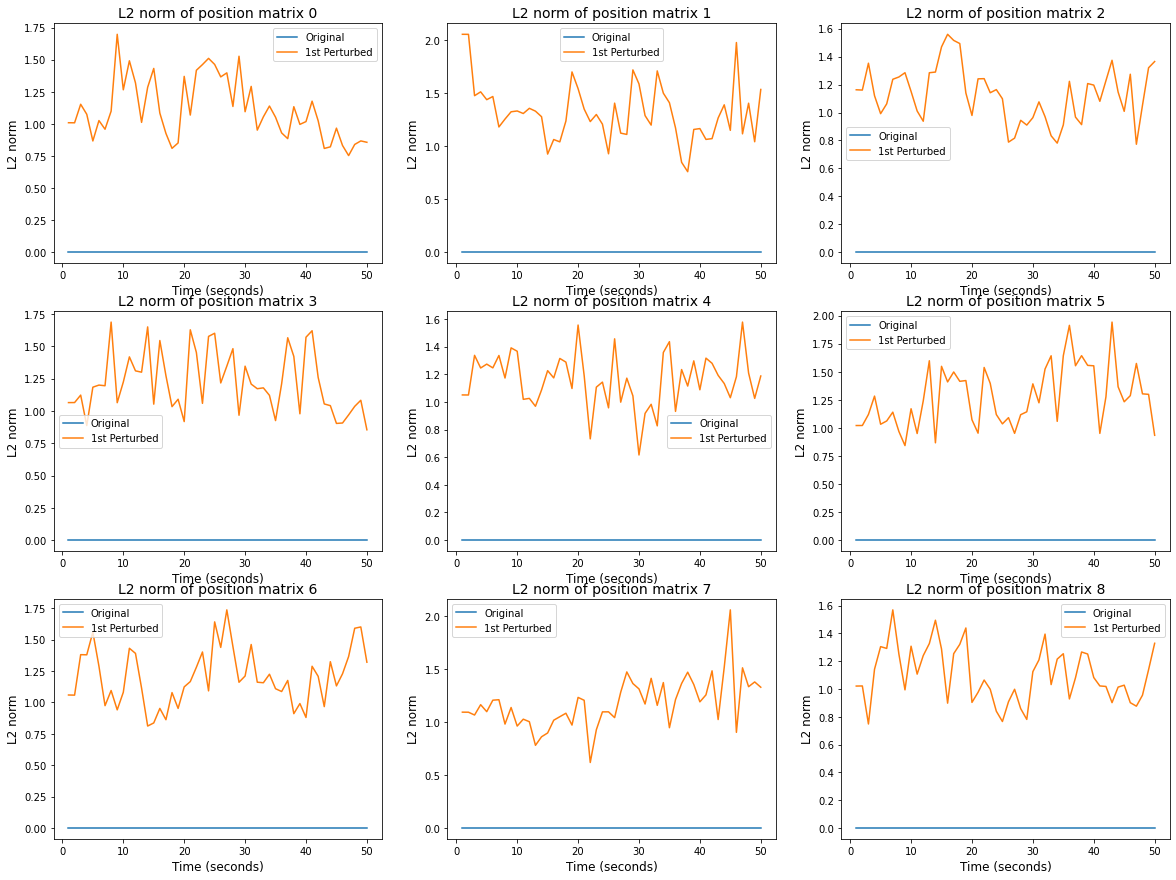

In [106]:

delta_t = 1*10**-3
delta_t2 = 1*10**-3

record_steps = 1000
time_simulated = 50
simulation_repetitions = time_simulated/delta_t
simulation_repetitions2 = time_simulated/delta_t2


times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
times2 = np.arange(1*delta_t2*record_steps, simulation_repetitions2*delta_t2 + delta_t2*record_steps , delta_t2*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []
    X8_perturbed_distance = []
    X10_perturbed_distance = []
    X12_perturbed_distance = []
    X14_perturbed_distance = []





    for i in range(len(X1_sprott_DF["X1"])-1):
        X1_distance.append(norm(X1_sprott_DF.iloc[i,j]))
        
    for i in range(len(X1_sprott_DF["X1"])-1):
        X2_perturbed_distance.append(norm(X2_sprott_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(X5_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X7_DF.iloc[i,j]))
        #X8_perturbed_distance.append(norm(X6_DF.iloc[i,j]))
        #X10_perturbed_distance.append(norm(X8_DF.iloc[i,j]))
        #X12_perturbed_distance.append(norm(X9_DF.iloc[i,j]))
        #X14_perturbed_distance.append(norm(X10_DF.iloc[i,j]))




    
    plt.plot(times2,X1_distance, label = "Original")
    plt.plot(times2,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "2nd Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    #plt.plot(times,X8_perturbed_distance, label = "4th Perturbed")
    #plt.plot(times,X10_perturbed_distance, label = "5th Perturbed")
    #plt.plot(times,X12_perturbed_distance, label = "6th Perturbed")
    #plt.plot(times,X14_perturbed_distance, label = "7th Perturbed")

    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of X_simulation_2

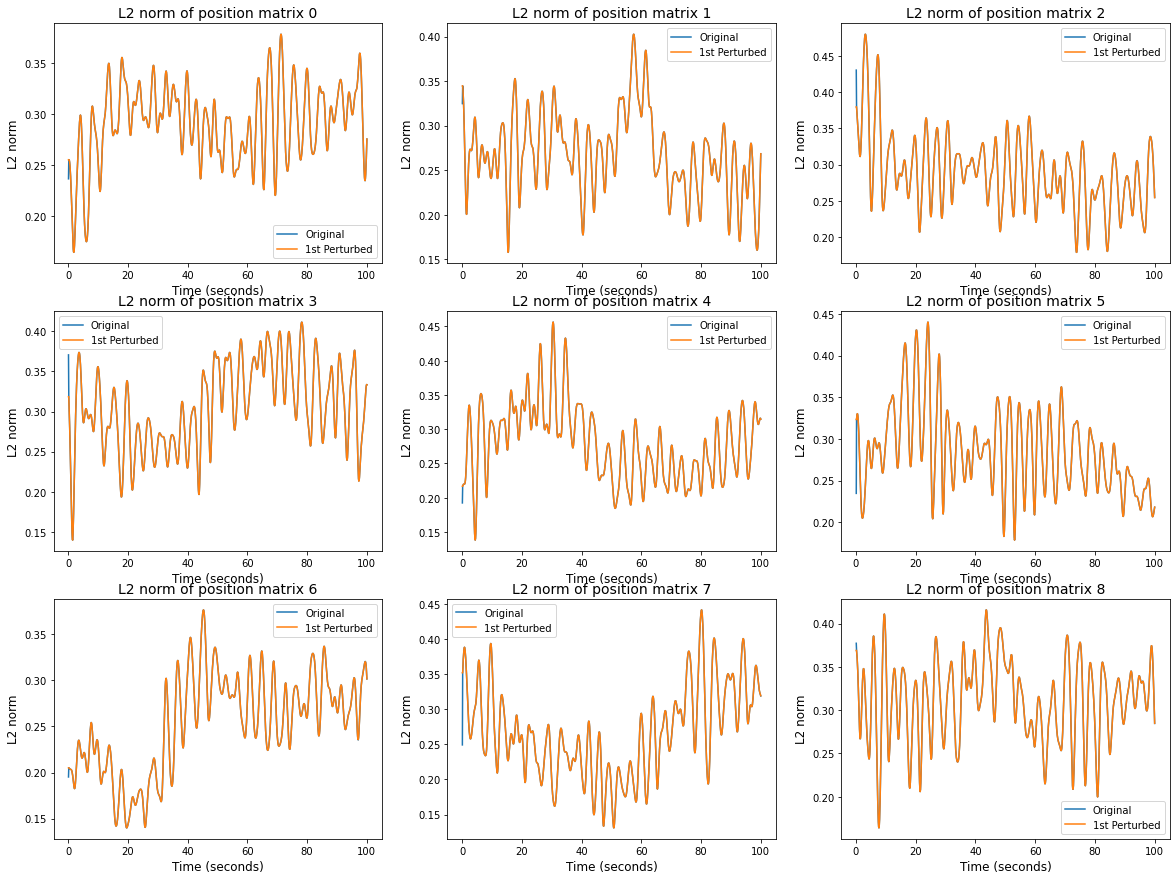

In [43]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(V1_DF.iloc[i,j]))
        X2_perturbed_distance.append(norm(V2_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(V2_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(V5_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


**Using paper's separation formula**

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Lyapunov exponent graph. H = 0.010539')

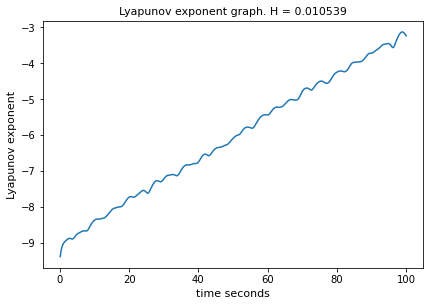

In [59]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (15,10))
X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )


        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
for el in X1_distance:
    print(el.imag)
    if el.imag != 0:
        print(el)
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539", fontsize = 11)





(0.8847461304976344+0j)
(0.8741120172589426+0j)


C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


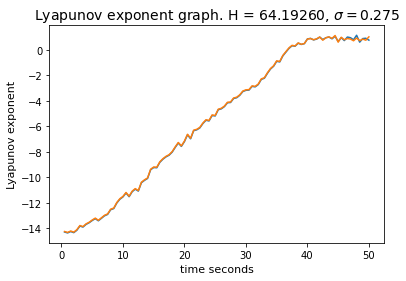

In [117]:
delta_t = 5*10**-4
record_steps = 1000
time_simulated = 50
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
X1_distance = []
for i in range(len(X9_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X9_DF.iloc[i+1,j])-np.array(X10_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.log(np.sqrt(sumX)))
for el in X1_distance:
    el = el.real

average = (np.sum(X1_distance[80:])/len((X1_distance[80:]))) 
print(average)
    
    
    
X2_distance = []
for i in range(len(X9_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X9_DF.iloc[i+1,j])-np.array(X11_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X2_distance.append(np.log(np.sqrt(sumX)))
for el in X2_distance:
    el = el.real

average = (np.sum(X2_distance[80:])/len((X2_distance[80:]))) 
print(average)
    
    
    
plt.plot(times, (X1_distance))
plt.plot(times, (X2_distance))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 64.19260, $\sigma = 0.275$", fontsize = 14)
plt.savefig("Run 3", dpi = 100)
#plt.ylim(0,1)

ValueError: x and y must have same first dimension, but have shapes (2000,) and (400,)

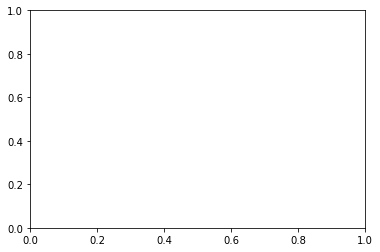

In [125]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
    

    
    
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539, $\sigma = 0.1.", fontsize = 11)
plt.savefig("Run 3", dpi = 100)



-0.6024932596436223
-0.44257583134158535


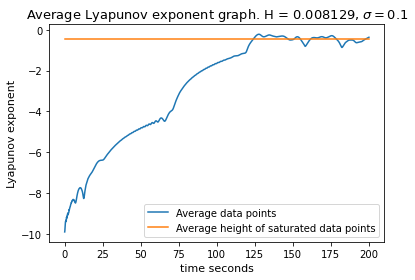

In [138]:
Xaverage_distance = []

for i in range(len(X3_DF["X1"])-1):
    average = (X1_distance[i] + X5_distance[i] + X3_distance[i]+ X4_distance[i]) /5
    Xaverage_distance.append(average)
print(np.log(np.sqrt(np.array(Xaverage_distance[1600]))))
# Average height from t = 125 s onwards
print(np.sum(np.log(np.sqrt(np.array(Xaverage_distance[1250:])))/len(Xaverage_distance[1250:])))
    
plt.plot(times, np.log(np.sqrt(Xaverage_distance)))
plt.plot([0,200],[-0.44257583134158535 ,-0.44257583134158535])
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Average Lyapunov exponent graph. H = 0.008129, $\sigma = 0.1.$", fontsize = 13)
plt.legend(["Average data points","Average height of saturated data points"])
plt.savefig("Run 3 average", dpi = 100)

**Sprott**

C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


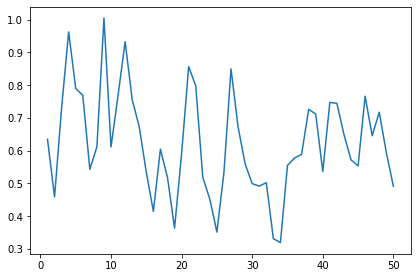

In [126]:
delta_t = 1*10**-3
record_steps = 1000
time_simulated = 50
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)


plt.figure(figsize = (15,10))
X1_distance = []
for i in range(len(X1_sprott_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X6_DF.iloc[i+1,j])
        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
plt.plot(times, (np.log(X1_distance)))


Leading Lyapunov exponent

In [140]:
sumX = 0
el1 = X1_distance[0].real
print(type(X1_distance[23]))
for el in X1_distance:
    el = el.real
    sumX += np.log(el/el1)
    
1/(len(X1_distance)*1e-3) * sumX


<class 'numpy.complex128'>


-11.163787637638638

In [ ]:
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
X1_distance = []
for i in range(len(X1_sprott_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_sprott_DF.iloc[i+1,j])-np.array(X2_sprott_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.log(np.sqrt(sumX)))
for el in X1_distance:
    el = el.real

average = (np.sum(X1_distance[80:])/len((X1_distance[80:]))) 
print(average)

plt.plot(times, (X1_distance))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 64.19260, $\sigma = 0.275$", fontsize = 14)
plt.savefig("Run 3", dpi = 100)
#plt.ylim(0,1)